El número buscado es menor
El número buscado es menor
El número buscado es mayor
El número buscado es menor
El número buscado es menor
El número buscado es menor
El número buscado es menor
El número buscado es menor
El número buscado es mayor
El número buscado es mayor
¡Bien hecho! Adivinaste el número.
Jugadores registrados:
1. Emily
2. 10
3. 600
4. karim
5. 43
6. Juan
Estadísticas de partidas:


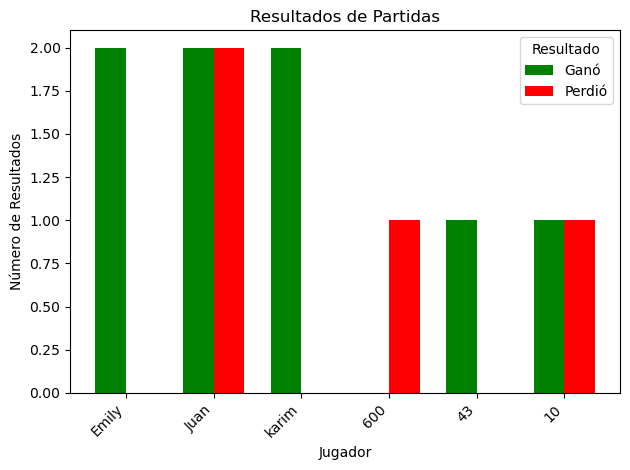

El número buscado es mayor
El número buscado es mayor
El número buscado es mayor
El número buscado es mayor
¡Bien hecho! Adivinaste el número.
Jugadores registrados:
1. Emily
2. 10
3. 600
4. karim
5. 43
6. Juan
Salir


In [22]:
#Mediante el desarrollo del siguiente juego en Python deberá utilizarse todo lo aprendido en clase valorando la correcta decisión en el uso de los algoritmos.
#Se pretende realizar mediante el lenguaje Python un programa que simule un juego de adivinanza.
#Al comenzar el juego y durante el desarrollo del mismo las opciones que se muestran hasta elegir la opción salir son:
#1. Partida modo solitario
#2. Partida 2 Jugadores
#3. Estadística
#4. Salir
#Modo solitario supone que el número a adivinar es generado aleatoriamente por el ordenador.
#Modo 2 Jugadores: primero se escribe un número a adivinar y luego un segundo jugador intenta adivinarlo.
#El número a adivinar debe ser entre 1 y 1000.
#Tanto la opción 1 como la opción 2 tendrán el siguiente submenú para elegir la dificultad
#1. Fácil (20 intentos)
#2. Medio (12 intentos)
#3. Difícil (5 intentos)
#En ambos menús debe chequearse que la opción elegida es válida y avisar en caso contrario.
#Si se adivina el número se gana la partida y se vuelve al menú principal, sino se indica si el número buscado es mayor o menor.
#Si se supera el número de intentos se pierde y se vuelve al menú principal.
#Se gane o se pierda se pide el nombre del jugador y se guarda esta información junto con el resultado de la partida en un fichero Excel.
#La opción estadística nos mostrara los datos almacenados en Excel.
#Mejoras como numero oculto, elegir dificultad en relación al número a adivinar, estadísticas filtradas por usuario…harán que la nota sea máxima.

#Se importan las librerías a usar en el código
import random as r
import getpass
import openpyxl
from openpyxl import Workbook
import matplotlib.pyplot as plt


#Función "Registrar_resulado": Ejecuta la orden de abrir el archivo de excel si es que existe, en caso contario crea uno nuevo y le agrega los nombres de las columnas. 
#Adicional se agrega una fila con el nombre del jugador, el resultado y el número de intentos.
def registrar_resultado(nombre_jugador, resultado, intentos):
    try:
        workbook = openpyxl.load_workbook("Resultados.xlsx")
        sheet = workbook.active
    except FileNotFoundError:
        workbook = Workbook()
        sheet = workbook.active
        sheet.append(["Jugador", "Resultado", "Intentos"])  

    
    sheet.append([nombre_jugador, resultado, intentos])
    workbook.save("Resultados.xlsx")
    workbook.close()

#Función "Mostrar_estadisticas": Mediante el archivo de excel, se crean 3 listas para almacenar los datos (jugadores, ganados, perdidos).
#Si el jugador no está en la lista, lo agrega y establece su contador de victorias y derrotas en 0, si esta en la lista, la actualiza. Si hay jugadores registrados, genera el gráfico correspondiente, si no, informa mediante un mensaje.
def mostrar_estadisticas():
    try:
        workbook = openpyxl.load_workbook("Resultados.xlsx")
        sheet = workbook.active

        print("Estadísticas de partidas:")
        jugadores = []
        ganados = []
        perdidos = []

        for row in sheet.iter_rows(min_row=2, values_only=True):
            jugador = row[0] 
            resultado = row[1] 

            if jugador not in jugadores:
                jugadores.append(jugador)
                ganados.append(0)
                perdidos.append(0)

            idx = jugadores.index(jugador)
            if resultado == "Ganó":
                ganados[idx] += 1
            elif resultado == "Perdió":
                perdidos[idx] += 1

        if jugadores:
            fig, ax = plt.subplots()

            bar_width = 0.35
            index = range(len(jugadores))

            ax.bar(index, ganados, bar_width, color='green', label='Ganó')
            ax.bar([i + bar_width for i in index], perdidos, bar_width, color='red', label='Perdió')

            ax.set_xlabel('Jugador')
            ax.set_ylabel('Número de Resultados')
            ax.set_title('Resultados de Partidas')
            ax.set_xticks([i + bar_width / 2 for i in index])  
            ax.set_xticklabels(jugadores)
            ax.legend(title="Resultado")

            plt.xticks(rotation=45, ha="right") 
            plt.tight_layout()  
            plt.show()  

        else:
            print("No hay datos suficientes para mostrar estadísticas.")

        workbook.close()

    except FileNotFoundError:
        print("No hay estadísticas registradas aún.")   

#Función "Seleccionar_jugador": Abre el archivo de Excel para extraer los nombres de los jugadores registrados previamente, muestra la lista de los jugadores y los ennumera para que el usuario escoja un nombre.
#En caso de que no existan jugadores previos se informa y te pide que ingreses tu nombre.
def seleccionar_jugador():
    try:
        workbook = openpyxl.load_workbook("Resultados.xlsx")
        sheet = workbook.active
        jugadores = list({sheet[f"A{row}"].value for row in range(2, sheet.max_row + 1) if sheet[f"A{row}"].value})

        if jugadores:
            print("Jugadores registrados:")
            for i, jugador in enumerate(jugadores, 1):
                print(f"{i}. {jugador}")
        
            seleccion = input("Seleccione un jugador por número o ingrese un nombre nuevo: ")
            
            if seleccion.isdigit() and 1 <= int(seleccion) <= len(jugadores):
                return jugadores[int(seleccion) - 1]
            else:
                return seleccion.strip()
        else:
            return input("No hay jugadores registrados. Ingresa tu nombre: ")
    
    except FileNotFoundError:
        return input("No hay jugadores registrados. Ingresa tu nombre: ")

#Función "Dificultad": Mediante un loop se valida que el usuario ingrese una opción valida para el nivel de dificultad, posteriormente de acuerdo a la opción elegida se asigna un número de de intentos.
#Si el usuario escoge la opción "sugerir dificultad", se clasifica el número a adivinar y se le asigna una dificultad del 1 al 3.
def Dificultad(numero):
    dificultad = int(input("Seleccione una dificultad: 1.Fácil(20 int) / 2.Dificil (12 int) / 3.Muy Dificil (5 int) / 4.Sugerida  "))
    while dificultad < 1 or dificultad > 4:
        dificultad = int(input("Opción incorrecta. Seleccione una dificultad: 1.Fácil(20 int) / 2.Dificil (12 int) / 3.Muy Dificil (5 int) / 4.Sugerida "))

    if dificultad == 1:
        d = 20
    elif dificultad == 2:
        d = 12
    elif dificultad == 3:
        d = 5
    elif dificultad == 4:
        if numero % 100 == 0 or numero == 1 or numero == 1000:
            d = 5
        elif numero % 5 == 0 or numero in range(1, 100):
            d = 12
        else:
            d = 20
    return d

#Función "Adivina": El jugador que va a adivinar el número debe introducir un número entre 1 y 1000, si el número no coincide con el número buscado, mostrará un mensaje informando si el número buscado es mayor o menor.
#En caso de que el jugador adivine el número lo informará, en caso de que el jugador agoté sus intentos y no adiviné el número lo informará también mediante un mensaje.
def Adivina(d, numero):
    intentos_iniciales = d
    while d > 0:
        adivina = int(input("Adivina el número entre 1 y 1000. Tienes " + str(d) + " intentos: "))
        while adivina < 1 or adivina > 1000:
            adivina = int(input("Número incorrecto. Adivina el número entre 1 y 1000. Tienes " + str(d) + " intentos: "))
        if adivina == numero:
            print("¡Bien hecho! Adivinaste el número.")
            return intentos_iniciales - d + 1 
        elif adivina > numero:
            print("El número buscado es menor")
        else:
            print("El número buscado es mayor")
        d -= 1
    print("Se acabaron los intentos. El número buscado era: " + str(numero))
    return -1  

#Función "Menú": Se solicita al usuario que escoja una opción del menú para empezar (en caso de que sea incorrecto se informa y se avisa). De acuerdo al número elegido llama a otra de las funciones elegidas anteriormente.
#En caso de elegir la opción 4 el programa termina.
def menu():
    while True:
        opcion = int(input("BIENVENIDO. JUEGO ADIVINA EL NÚMERO. Elija una opción del menú: 1.Partida modo solitario / 2.Partida 2 Jugadores / 3.Estadística / 4.Salir "))
        
        while opcion < 1 or opcion > 4:
            opcion = int(input("Opción incorrecta. Elija una opción del menú: 1.Partida modo solitario / 2.Partida 2 Jugadores / 3.Estadística / 4.Salir "))

        if opcion == 4:
            print("Salir")
            break
        
        elif opcion == 1:
            numero = r.randint(1, 1000)
            d = Dificultad(numero)
            intentos_usados = Adivina(d, numero)
            nombre_jugador = seleccionar_jugador()
            if intentos_usados != -1:
                registrar_resultado(nombre_jugador, "Ganó", intentos_usados)
            else:
                registrar_resultado(nombre_jugador, "Perdió", d)
        
        elif opcion == 2:
            numero = int(getpass.getpass("Jugador 1: Introduce un número entre 1 y 1000: "))
            while numero < 1 or numero > 1000:
                numero = int(getpass.getpass("Jugador 1: Introduce un número entre 1 y 1000: "))
            
            d = Dificultad(numero)
            intentos_usados = Adivina(d, numero)
            nombre_jugador = seleccionar_jugador()
            if intentos_usados != -1:
                registrar_resultado(nombre_jugador, "Ganó", intentos_usados)
            else:
                registrar_resultado(nombre_jugador, "Perdió", d)
        
        elif opcion == 3:
            mostrar_estadisticas()

#Se inicia el programa con la opción "Menu"
menu()